In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [127]:
df = pd.read_csv("marketing_campaign_v2.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,complain_new,response_new
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,3,11,No,Yes
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,3,11,No,No
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,3,11,No,No
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,3,11,No,No
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,3,11,No,No


In [128]:
print("Columns :", df.shape[1])
print("Rows : ", df.shape[0])

Columns : 29
Rows :  2240


# Data Cleaning

In [129]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Z_CostContact          0
Z_Revenue              0
complain_new           0
response_new           0
dtype: int64

In [130]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,51687.459375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,3.0,11.0
std,3246.662198,11.984069,25609.342730,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.0,0.0
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0


# EDA

KPI: Checking if they are parents or not.

In [131]:
df[['ID', 'Kidhome']].sort_values(by = 'Kidhome', ascending = False)

,ID,Kidhome
1418,5654,2
328,10350,2
137,9579,2
635,8461,2
1372,10258,2
...,...,...
938,3673,0
937,1204,0
936,1628,0
934,4843,0


KPI: If they are married 

In [132]:
df[['ID', 'Marital_Status']].sort_values(by = 'Marital_Status', ascending = False)

,ID,Marital_Status
2177,492,YOLO
2202,11133,YOLO
1961,3009,Widow
240,313,Widow
489,3921,Widow
...,...,...
138,7660,Alone
131,433,Alone
153,92,Alone
2093,7734,Absurd


KPI: Marital status of customers

Text(0.5, 1.0, 'Marital status')

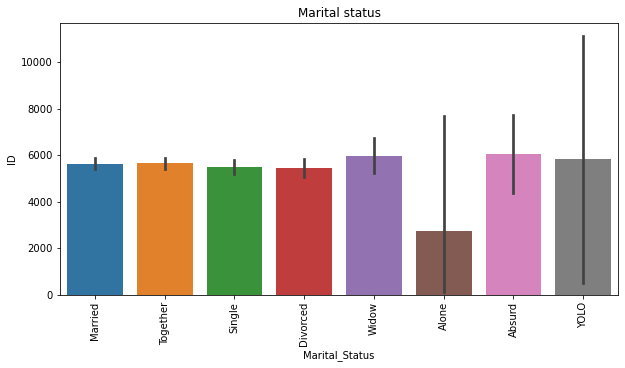

In [133]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.barplot(x=df['Marital_Status'], y=df['ID'], order = df.Marital_Status.value_counts().index)
plt.title('Marital status')

KPI: Educational Qualification of customers 

Text(0.5, 1.0, 'Educational Qualification')

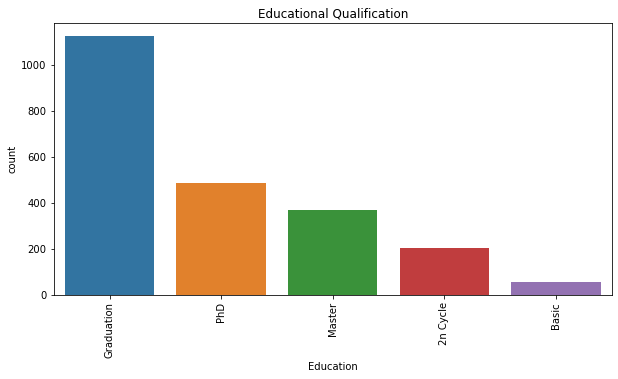

In [134]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['Education'], order = df.Education.value_counts().index)
plt.title('Educational Qualification')

KPI: Customer and their income

Text(0.5, 1.0, 'Income based dustribution')

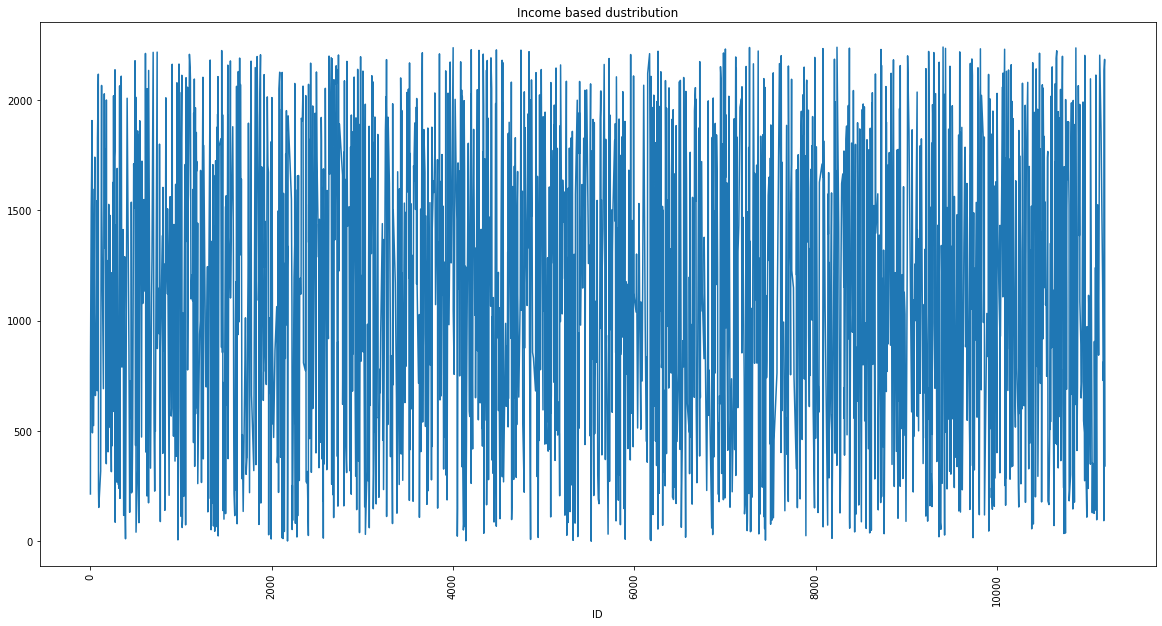

In [135]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.lineplot(x=df['ID'], y=df['Income'].index)
plt.title('Income based dustribution')

KPI: Total Expendature done by top 10 customers

In [136]:
df["total"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,complain_new,response_new,total
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,No,Yes,1617
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,No,No,27
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,No,No,776
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,No,No,53
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,No,No,422


In [137]:
df[['ID', 'total']].sort_values(by = 'total', ascending = False).head(10)

,ID,total
1572,5350,2525
1179,5735,2525
1492,1763,2524
987,4580,2486
1052,4475,2440
1601,5453,2352
1458,10133,2349
1288,9010,2346
943,5386,2302
1301,6024,2302


KPI: Person wno didnt purchase in some days

In [138]:
df[['ID', 'Recency']].sort_values(by = 'Recency', ascending = False).head(20)

,ID,Recency
685,10142,99
1800,2831,99
38,8595,99
1685,7947,99
1033,5263,99
491,22,99
1820,2415,99
192,7829,99
444,2106,99
700,9977,99


KPI: Distribution of total Expendature

C:\Users\SAKSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


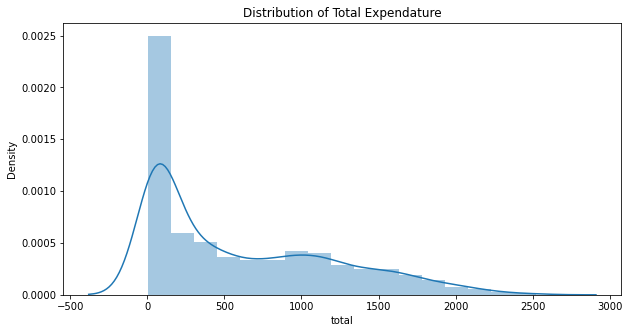

In [139]:
plt.figure(figsize=(10,5))
sns.distplot(df['total'])
plt.title("Distribution of Total Expendature")
plt.show()

KPI: Customer purchasing from different website

Text(0.5, 1.0, 'Purchase from web')

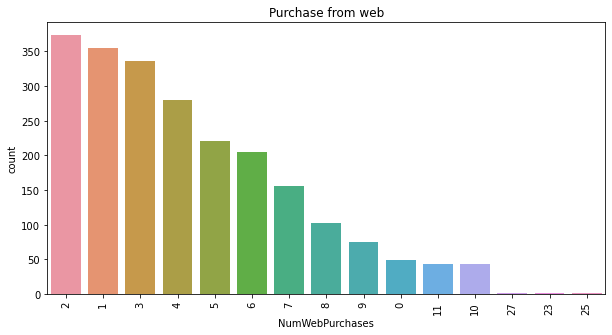

In [140]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['NumWebPurchases'], order = df.NumWebPurchases.value_counts().index)
plt.title('Purchase from web')

KPI: Customer purchasing from different catalog

Text(0.5, 1.0, 'Purchase based on catalog')

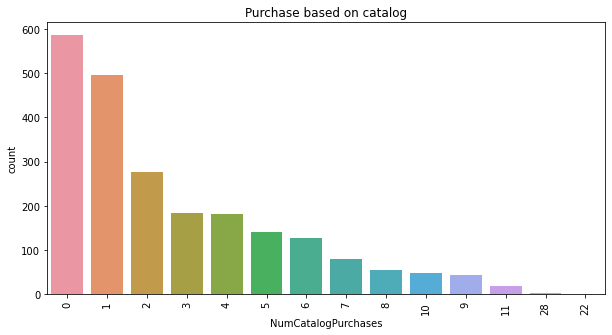

In [141]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['NumCatalogPurchases'], order = df.NumCatalogPurchases.value_counts().index)
plt.title('Purchase based on catalog')

KPI: Customer purchasing from different store

Text(0.5, 1.0, 'Customer purchases from store')

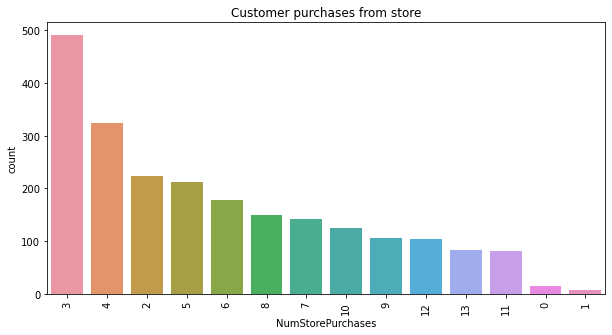

In [142]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['NumStorePurchases'], order = df.NumStorePurchases.value_counts().index)
plt.title('Customer purchases from store')

KPI: Customer visitinf different website

Text(0.5, 1.0, 'website visited by customer')

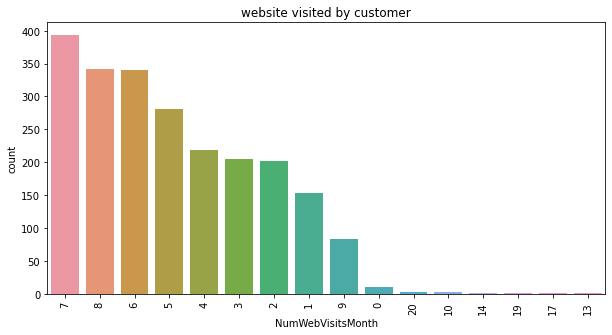

In [143]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['NumWebVisitsMonth'], order = df.NumWebVisitsMonth.value_counts().index)
plt.title('website visited by customer')

KPI: Complain raised by customer

Text(0.5, 1.0, 'Complain raised by number of customers')

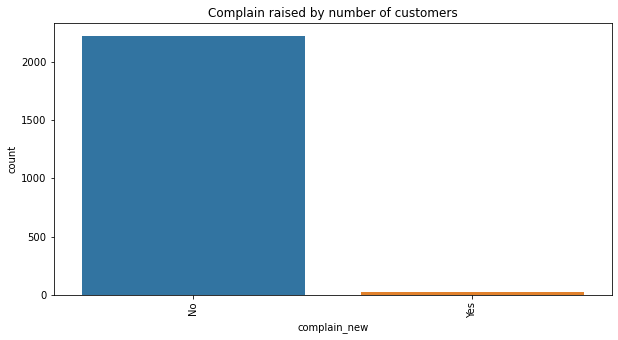

In [144]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['complain_new'], order = df.complain_new.value_counts().index)
plt.title('Complain raised by number of customers')

KPI: Response to the complain

Text(0.5, 1.0, 'Response of complain')

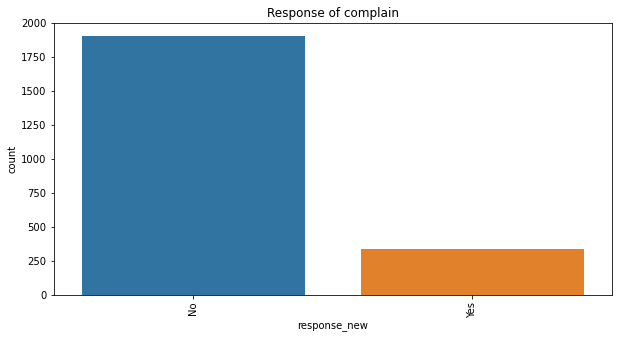

In [145]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10, rotation = 'vertical')
sns.countplot(x=df['response_new'], order = df.response_new.value_counts().index)
plt.title('Response of complain')

# Exporting data

In [146]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,complain_new,response_new,total
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,No,Yes,1617
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,No,No,27
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,No,No,776
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,No,No,53
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,No,No,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,No,No,1341
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,406,...,0,0,0,1,0,3,11,No,No,444
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,908,...,0,1,0,0,0,3,11,No,No,1241
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,No,No,843


In [147]:
df.to_excel('marketing_campaign_v2_New.xlsx')